## Step 1: Import necessary libraries

In [372]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [373]:
# Numpy & Pandas
import numpy as np
import pandas as pd
from math import sqrt

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

## Step 2: Reading & Understanding the data

In [374]:
bike_sharing = pd.read_csv("day.csv")

In [375]:
# Checking the top 5 rows of the dataframe
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [376]:
# Checking the last 5 rows of the dataframe
bike_sharing.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [377]:
# Checking the shape of the dataframe 
bike_sharing.shape

(730, 16)

In [378]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [379]:
# Checking the summary of numerical columns
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Insight: 
- Some fields such as season, mnth, weathersit etc. are categorical in nature, but are in `integer (or) float` type.

In [380]:
# Checking missing values
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Insight:
- There are no missing values in any of the columns and rows.

### 2.1 Removing Redundant Columns

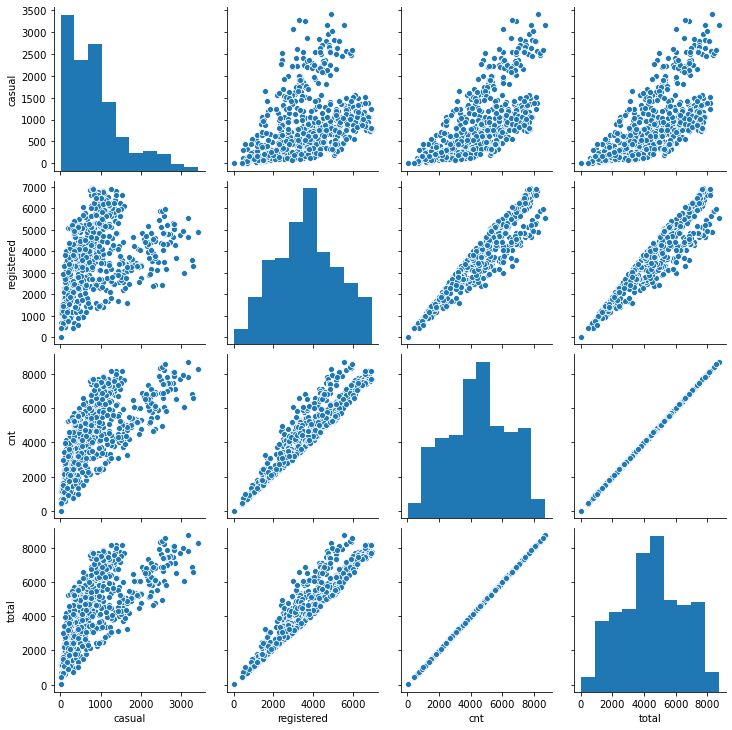

In [381]:
# Checking the relationship between casual, registered and cnt column
bike_sharing_cnt = bike_sharing[['casual','registered','cnt']]

# Creating a column whch will show the value of casual + registered
bike_sharing_cnt['total'] = bike_sharing_cnt['casual'] + bike_sharing_cnt['registered']
sns.pairplot(bike_sharing_cnt)
plt.show()

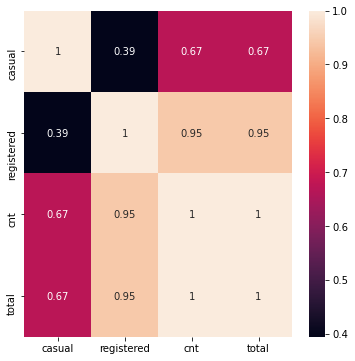

In [382]:
# Checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_sharing_cnt.corr(), annot = True)
plt.show()

#### Note:
Based on the analysis of the data and the data dictionary, the following variables can be removed from further analysis:

- `instant`: It is only an index value. So, it can be removed.
- `dteday`: This has the date, since we already have separate columns for 'year' & 'month' we can remove this column.
- `casual & registered`: Both these columns contains the count of bike booked by different categories of customers. From the pairplot as well as the correlation heatmap, we can concur that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we can remove these two columns.

In [383]:
# Dropping the unwanted columns
bike_sharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


In [384]:
bike_sharing.shape

(730, 12)

## Step 3: Encoding & Visualizing the data

### 3.1 Encoding Categorical columns

Converting season, mnth, weathersit and weekday to categorical columns.

- `season`: Converting season values as - 1:Spring, 2:Summer, 3:Fall, 4:Winter.
- `mnth`: Converting mnth values as - 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec.
- `weathersit`: Converting weathersit values as - 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow.
- `weekday`: Converting weekday values as - 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat.

In [385]:
# Converting season
bike_sharing.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bike_sharing.season.value_counts(normalize=True)

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [386]:
# Converting mnth
bike_sharing.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike_sharing.mnth.value_counts(normalize=True)

Dec    0.084932
Jul    0.084932
May    0.084932
Aug    0.084932
Oct    0.084932
Mar    0.084932
Jan    0.084932
Nov    0.082192
Jun    0.082192
Apr    0.082192
Sep    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [387]:
# Converting weathersit
bike_sharing.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike_sharing.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [388]:
# Converting weekday
bike_sharing.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike_sharing.weekday.value_counts(normalize=True)

Tuesday      0.143836
Monday       0.143836
Saturday     0.142466
Friday       0.142466
Sunday       0.142466
Wednesday    0.142466
Thursday     0.142466
Name: weekday, dtype: float64

### 3.2 Categorical Variable Analysis

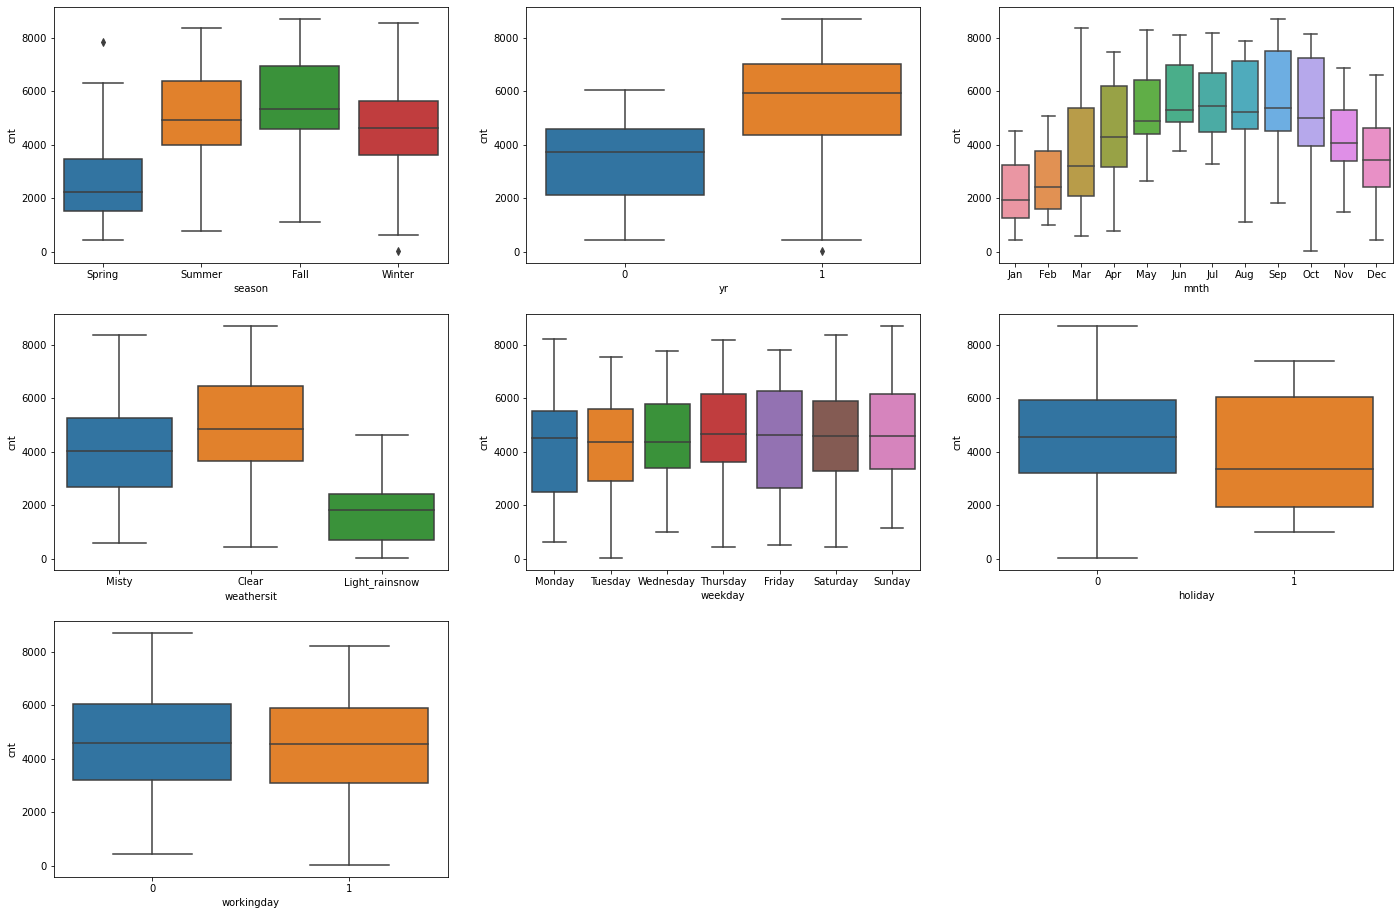

In [389]:
# Building boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt'.

plt.figure(figsize=(24, 16))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)

plt.show()

#### Insight:

- Bike Rentals are more during the `Fall` season and than in `Summer` season.
- Bike Rentals are more in the year `2019` compared to `2018`.
- Bike Rentals are more in `partly cloudy weather`.
- Bike Rentals are more on `Saturday`, `Wednesday` and `Thursday`.

In [390]:
# Function to generate statistics related to Categorical Variables

def categorical_stats(col):
    cat_df = bike_sharing.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike_sharing.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike_sharing.cnt.count()*100
    return round(cat_df,2)

In [391]:
# Function to generate plots related to Categorical Variables

def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike_sharing)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike_sharing, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

- Lets get a better understanding of the categorical variables by comparing each categorical variable against target variable `"cnt"`.

#### 3.2.1 Season

In [392]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


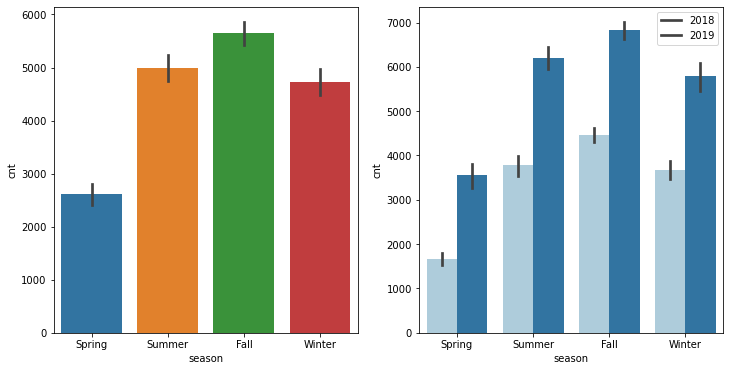

In [393]:
categorical_plot('season',12,6)

#### Insight:
- Almost `32%` of the bike bookings were happening in Fall with a median of over `5000` bookings (for two years). It is followed by Summer & Winter with `28%` & `25%`(approximately) of total bookings. It indicates that the season can be a good predictor of the dependent variable.

#### 3.2.2 Month

In [394]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


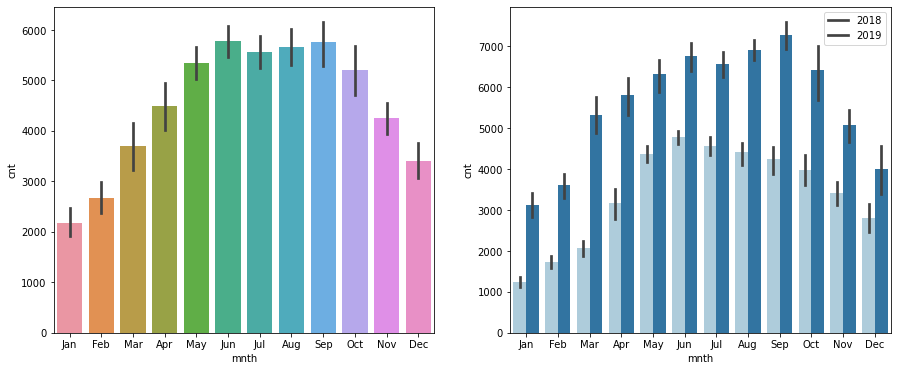

In [395]:
categorical_plot('mnth',15,6)

#### Insight:
- Almost `10%` of the bike bookings were happening in the months `May to Oct` with a median of over `5000` bookings (for two years)per month. It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.

#### 3.2.3 Weather

In [396]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


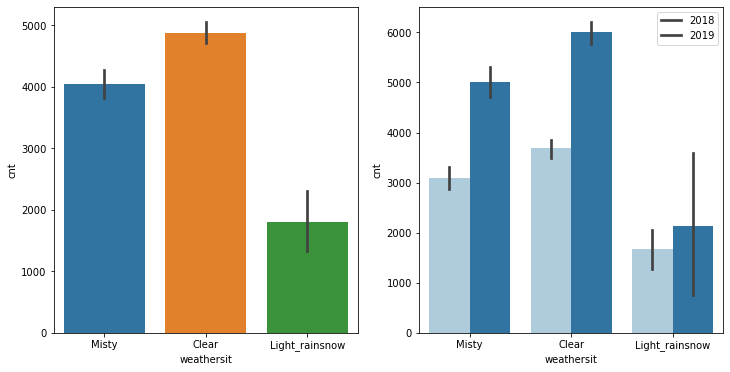

In [397]:
categorical_plot('weathersit',12,6)

#### Insight:
- Almost `68.6%` of the bike bookings were happening during Clear weather with a median of close to 5000 bookings (for two years). This was followed by Misty with `30%` of the total bookings. It indicates that the weathersit does show some trend towards the bike bookings, and it can be a good predictor for the dependent variable. Also, the current data frame does not have any data where the weather is Heavy_rainsnow.

#### 3.2.4 Weekday

In [398]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


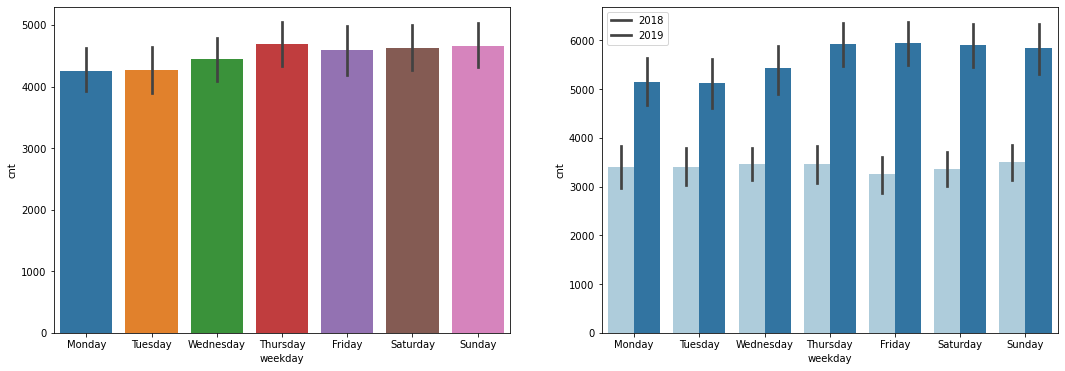

In [399]:
categorical_plot('weekday',18,6)

#### Insight:
- Weekday variable shows the very close trend between `13.5%-14.8%` of total bookings on all days of the week having their independent medians between `4000 to 5000` bookings. This variable can have some or no influence on the predictor. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection or not.

#### 3.2.5 Holiday

In [400]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


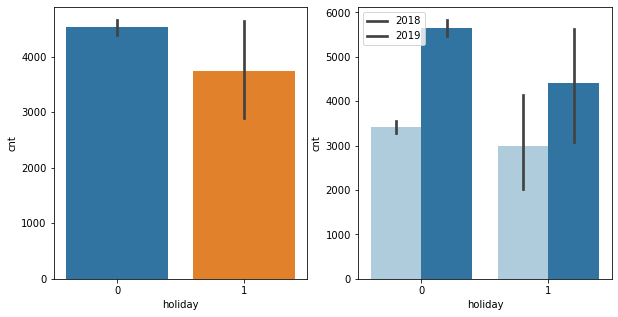

In [401]:
categorical_plot('holiday',10,5)

#### Insight:
- Almost `97%` of bike rentals are happening during non-holiday time.

#### 3.2.6 Working Day

In [402]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


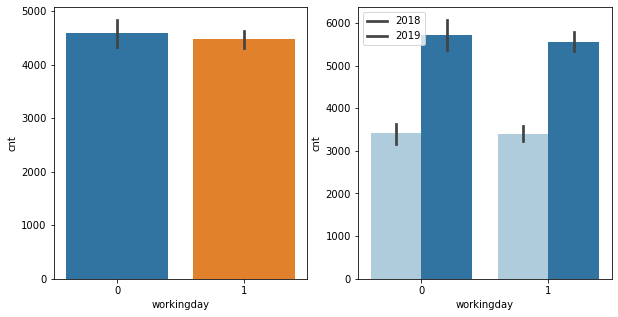

In [403]:
categorical_plot('workingday',10,5)

#### Insight:
- Almost `69%` of the bike bookings were happening on 'workingday' with a median of close to 5000 bookings (for two years). It indicates that the workingday can be a good predictor of the dependent variable.

#### 3.2.7 Year

In [404]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


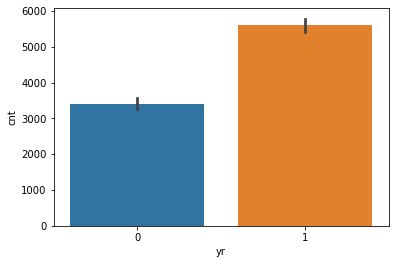

In [405]:
sns.barplot('yr','cnt',data = bike_sharing)
plt.show()

#### Insight:
- Bike rental demand has gone up from `2018 to 2019`.

### 3.3 Numerical Variable Analysis

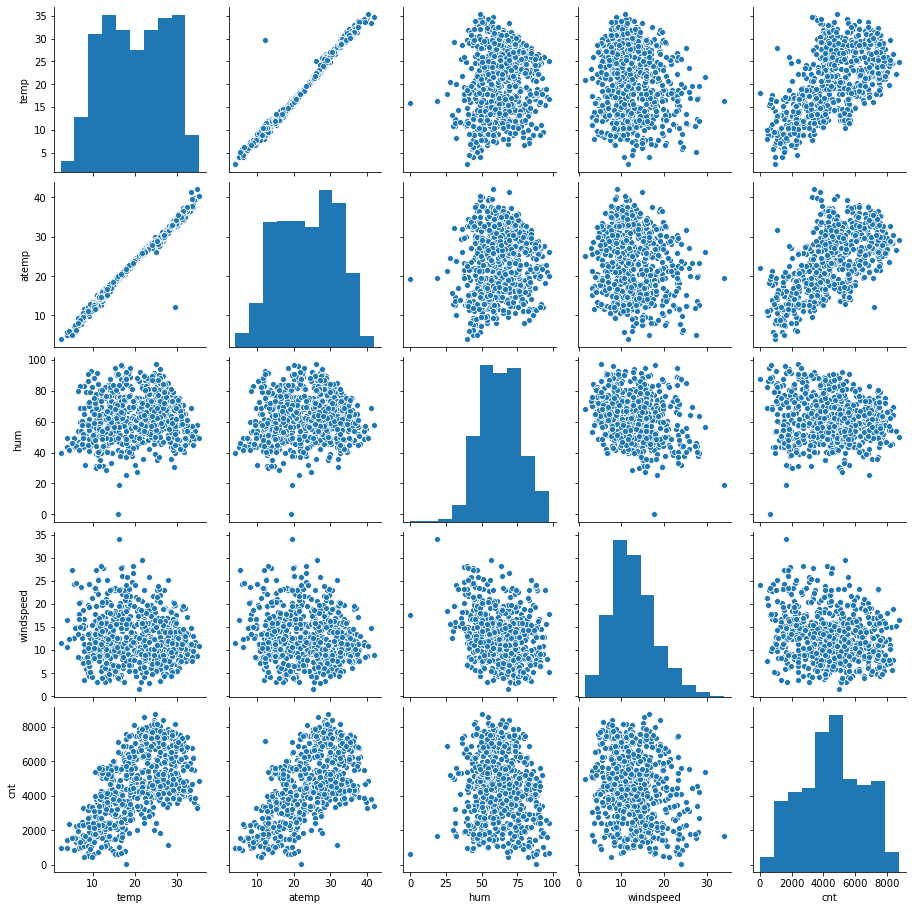

In [406]:
# Generating pairplot to check the relationships between numeric variables variables
bike_num = bike_sharing[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

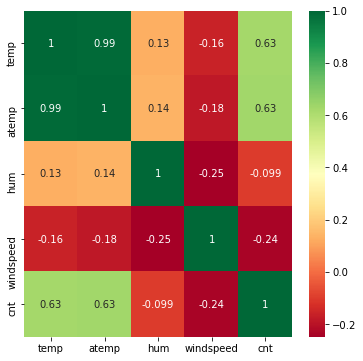

In [407]:
# Checking correlation of the parameters by mapping a correlation heatmap
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn")

#### Insight: 
- There is linear relationship between temp and atemp. Both of these parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables.

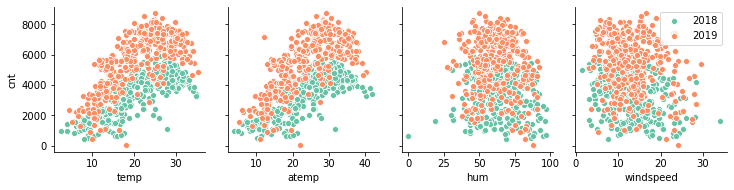

In [408]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike_sharing, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

#### Insight:
- All the parameters have increased values in `2019 compared to 2018`. Thus, year may become a key paratemeter in the model.

## Step 4: Data Preparation

### 4.1 Dummy Variable Creation

#### 4.1.1 Season

In [409]:
season = pd.get_dummies(bike_sharing['season'], drop_first = True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### 4.1.2 Weather

In [410]:
weather = pd.get_dummies(bike_sharing['weathersit'], drop_first = True)
weather.head()

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


#### 4.1.3 Month

In [411]:
month = pd.get_dummies(bike_sharing['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


#### 4.1.4 Weekday

In [412]:
weekday = pd.get_dummies(bike_sharing['weekday'], drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


### 4.2 Merging the Dataframes

In [413]:
# Creating a new dataframe called bike_sharing_new where season, month, weather and weekday dataframes are being added
bike_sharing_new = pd.concat([bike_sharing,season,month,weather,weekday], axis = 1)
bike_sharing_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [414]:
# Checking the shape of the dataframe 
bike_sharing_new.shape

(730, 34)

In [415]:
bike_sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Spring          730 non-null    uint8  
 13  Summer          730 non-null    uint8  
 14  Winter          730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

### 3.3 Removing Redundant Columns

In [416]:
# Deleting the unnecessary columns season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_sharing_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_sharing_new.shape

(730, 30)

In [417]:
bike_sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Spring          730 non-null    uint8  
 9   Summer          730 non-null    uint8  
 10  Winter          730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

#### Insight:
- All the `30` columns are now as numeric values. The dataframe is ready now for splitting into Train & Test dataframes.

## Step 5: Splitting the data into Train & Test Dataset

### 5.1. Train & Test Split

In [418]:
# We specify this so that the train and test data set always have the same rows respectively
np.random.seed(0)
bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing_new, train_size = 0.7, random_state = 333)

- Verifying the train - test split and new dataframe details.

In [419]:
bike_sharing_train.shape

(510, 30)

In [420]:
bike_sharing_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,20.218078,23.590696,62.340743,12.771365,4494.103922,0.250980,0.245098,...,0.084314,0.082353,0.025490,0.343137,0.141176,0.143137,0.145098,0.139216,0.152941,0.131373
std,0.500487,0.151726,0.462867,7.500110,8.138271,14.418728,5.205888,1948.315655,0.434003,0.430568,...,0.278131,0.275172,0.157763,0.475223,0.348545,0.350557,0.352545,0.346511,0.360284,0.338139
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717924,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327087,72.958300,15.624869,5962.750000,0.750000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [421]:
bike_sharing_test.shape

(220, 30)

In [422]:
bike_sharing_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,20.553817,24.040727,63.749086,12.745665,4540.236364,0.236364,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,7.533926,8.188064,13.790510,5.184271,1911.199159,0.425817,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Insight: 
- Based on the `70% - 30%` split between train and test dataset we have `510` rows in train dataset and `220` rows in test dataset respectively.

### 5.2 Rescaling bike_train dataframe

In [423]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [424]:
# Dataframe before scaling 
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,1,1,0,0,0,0,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,0,0,1,0
502,1,0,0,23.130847,27.55605,52.3333,9.166739,7639,0,1,...,0,0,0,0,0,1,0,0,0,0


In [425]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_sharing_train[num_vars] = scaler.fit_transform(bike_sharing_train[num_vars])

In [426]:
# Checking after rescaling
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,1,0,0,0,0,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,1,0
502,1,0,0,0.629300,0.619631,0.543723,0.235894,0.876323,0,1,...,0,0,0,0,0,1,0,0,0,0


### 5.3 Checking Correlation Coefficient

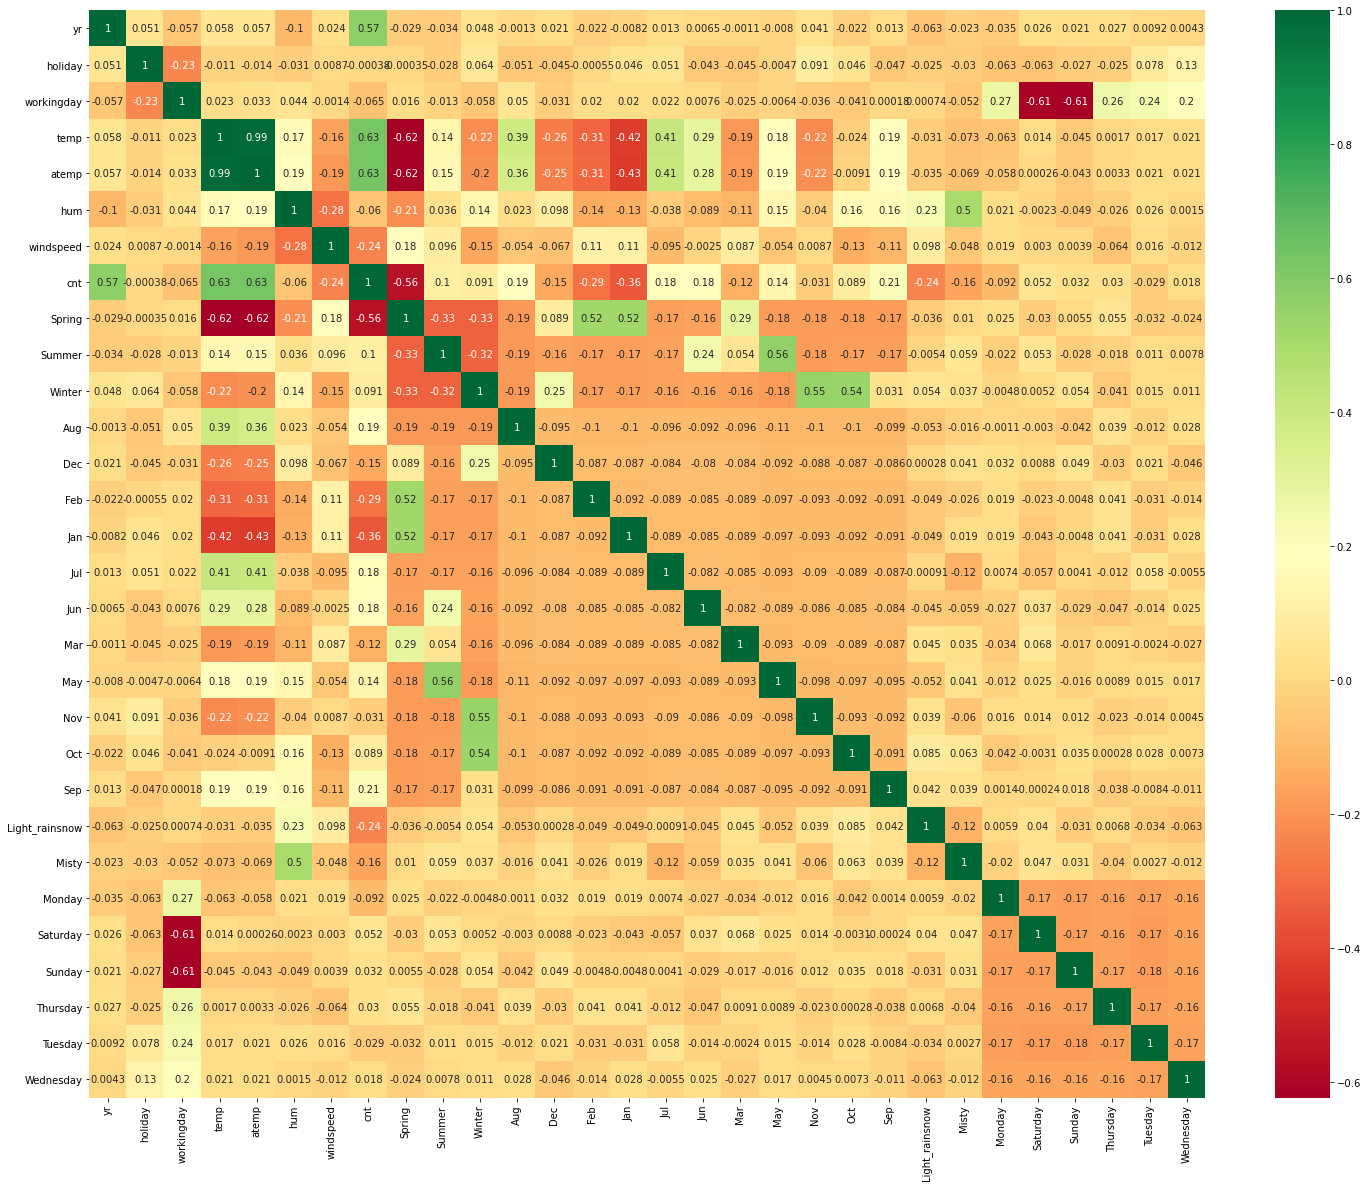

In [427]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Insight:

There is multi-colinearity between the variables. We need to consider the factors when developing the model.

- temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables.
- workingday variable has high negative correlation with Sat & Sun (where workingday= 0).
- Spring is negatively correlated with cnt.
- temp, atemp and yr has strong correlation with cnt.
- misty weather and humidity has correlation.
- various months and corresponding weather has correlation.

## Step 6: Building the Linear Model

### 6.1 Dividing into X_train and y_train

In [428]:
y_train = bike_sharing_train.pop('cnt')
X_train = bike_sharing_train

### 6.2 RFE

Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE.

In [429]:
# Running RFE with the output number of the variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)           
rfe = rfe.fit(X_train, y_train)

In [430]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 13),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 15),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11)]

In [431]:
# Storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Jul', 'Mar', 'Nov', 'Sep', 'Light_rainsnow', 'Misty', 'Saturday'],
      dtype='object')

In [432]:
# Checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Summer', 'Aug', 'Feb', 'Jan', 'Jun', 'May',
       'Oct', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [433]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

### 6.3 Manual Model Development using statsmodel

In [434]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

#### 6.3.1 Model 1

In [435]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,357.78
2,atemp,354.14
3,hum,22.92
4,windspeed,5.12
6,Winter,2.76
5,Spring,2.69
13,Misty,2.28
0,yr,2.05
10,Nov,1.83
8,Jul,1.42


In [436]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.15e-183
Time:                        21:09:46   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     494   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3602      0.033     10.

#### Insight: 
- Both temp and atemp has `high VIF` but atemp has high p-value additionally. We will go ahead with dropping atemp from the model.

#### 6.3.2 Model 2

In [437]:
# Dropping atemp from the the previous model
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,hum,22.50
1,temp,15.96
3,windspeed,5.01
5,Winter,2.73
4,Spring,2.69
12,Misty,2.27
0,yr,2.05
9,Nov,1.83
7,Jul,1.42
6,Dec,1.41


In [438]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.22e-184
Time:                        21:09:46   Log-Likelihood:                 501.10
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     495   BIC:                            -908.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3635      0.033     10.

#### Insight: 
- As hum has the highest VIF value, we will remove the hum variable next.

#### 6.3.3 Model 3

In [439]:
# Dropping hum from the the previous model
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.21
2,windspeed,4.97
4,Winter,2.35
0,yr,2.05
3,Spring,1.90
8,Nov,1.80
11,Misty,1.54
6,Jul,1.38
5,Dec,1.34
7,Mar,1.22


In [440]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.05e-181
Time:                        21:09:47   Log-Likelihood:                 491.69
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     496   BIC:                            -896.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2710      0.026     10.

#### Insight:
- Next we will remove Saturday due to high p-value.

#### 6.3.4 Model 4

In [441]:
# Dropping Saturday from the the previous model
X_train_new = X_train_new.drop(['Saturday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.12
2,windspeed,4.97
4,Winter,2.35
0,yr,2.04
3,Spring,1.90
8,Nov,1.80
11,Misty,1.53
6,Jul,1.37
5,Dec,1.34
7,Mar,1.21


In [442]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          7.99e-182
Time:                        21:20:09   Log-Likelihood:                 489.90
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     497   BIC:                            -898.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2729      0.026     10.

#### Insight: 
- Next we will remove Jul due to high p-value.

#### 6.3.5 Model 5

In [443]:
# Dropping Jul from the the previous model
X_train_new = X_train_new.drop(['Jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.86
1,temp,4.16
4,Winter,2.32
0,yr,2.04
3,Spring,1.90
7,Nov,1.79
10,Misty,1.51
5,Dec,1.34
6,Mar,1.21
8,Sep,1.18


In [444]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.65e-181
Time:                        21:23:53   Log-Likelihood:                 486.36
No. Observations:                 510   AIC:                            -948.7
Df Residuals:                     498   BIC:                            -897.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2828      0.026     11.

#### Insight: 
- Next we will remove Dec due to high p-value.

#### 6.3.6 Model 6

In [445]:
# Dropping Dec from the the previous model
X_train_new = X_train_new.drop(['Dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.85
1,temp,4.15
0,yr,2.04
4,Winter,1.92
3,Spring,1.84
6,Nov,1.64
9,Misty,1.51
5,Mar,1.20
7,Sep,1.16
8,Light_rainsnow,1.07


In [446]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.54e-181
Time:                        21:26:15   Log-Likelihood:                 482.12
No. Observations:                 510   AIC:                            -942.2
Df Residuals:                     499   BIC:                            -895.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2689      0.025     10.

#### Insight: 
- Next we will remove Nov due to high p-value.

#### 6.3.7 Model 7

In [447]:
# Dropping Nov from the the previous model
X_train_new = X_train_new.drop(['Nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.73
1,temp,4.09
0,yr,2.03
3,Spring,1.83
8,Misty,1.50
4,Winter,1.36
5,Mar,1.20
6,Sep,1.15
7,Light_rainsnow,1.07


In [448]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.71e-181
Time:                        21:31:20   Log-Likelihood:                 479.39
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2609      0.025     10.

In [449]:
# Checking the parameters obtained
lr7.params

const             0.260908
yr                0.231712
temp              0.424181
windspeed        -0.147194
Spring           -0.125117
Winter            0.049700
Mar               0.062063
Sep               0.071857
Light_rainsnow   -0.313553
Misty            -0.071187
dtype: float64

#### Insight: 
- This model looks good, as there seems to be `VERY LOW` Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.

## Step 7: Model Validation

Validating the assumptions of Linear Regression Model:

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals
- Normality of Errors

### 7.1 Linear Relationship

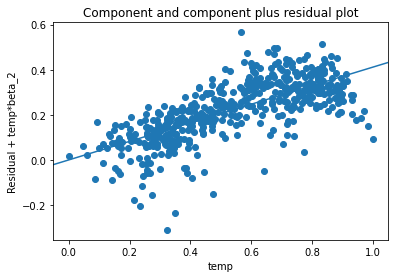

In [450]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

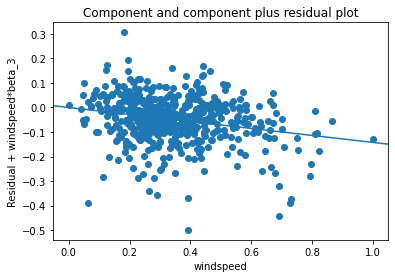

In [451]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

#### Insight: 
- The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved.

### 7.2 Homoscedasticity

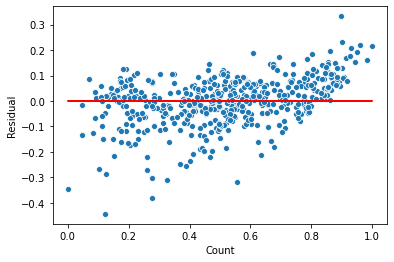

In [452]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Insight: 
- There is no visible pattern in residual values, thus homoscedacity is well preserved.

### 7.3 Absence of Multicolinearity

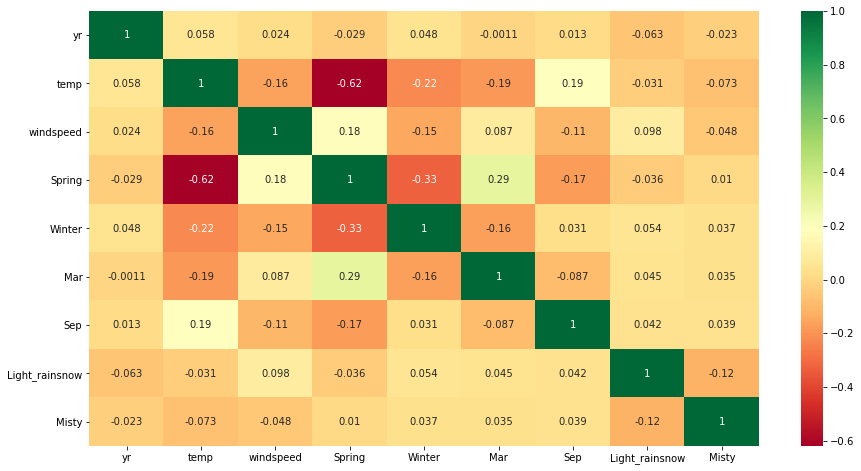

In [454]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [455]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.73
1,temp,4.09
0,yr,2.03
3,Spring,1.83
8,Misty,1.50
4,Winter,1.36
5,Mar,1.20
6,Sep,1.15
7,Light_rainsnow,1.07


#### Insight: 
- All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

### 7.4 Independence of residuals

Autocorrelation refers to the fact that observations errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.

- 0 – 2: positive auto-correlation
- 2 – 4: negative auto-correlation

In [456]:
print('The Durbin-Watson value for Final Model lr 7 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 7 is 1.9767


#### Insight: 
- There is almost no autocorrelation.

### 7.5 Normality of errors

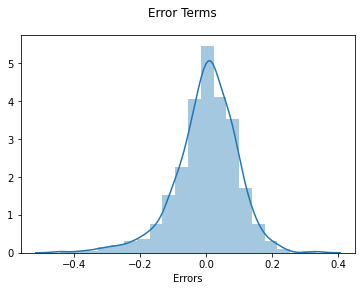

In [457]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

#### Insight: 
- Based on the histogram, we can conclude that the error terms are following a normal distribution.

## Step 8: Making Predictions using final model

### 8.1 Scaling bike_test dataframe

Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset.

In [458]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,0,0,1,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,0,1,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,1,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,1,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,1,0,0


In [459]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,0.550981,0.527344,0.662328,0.346015,0.519816,0.236364,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,0.228967,0.214959,0.143278,0.159517,0.219880,0.425817,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 8.2 Dividing X_test and y_test

In [460]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [461]:
# Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)

X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   temp            220 non-null    float64
 3   windspeed       220 non-null    float64
 4   Spring          220 non-null    uint8  
 5   Winter          220 non-null    uint8  
 6   Mar             220 non-null    uint8  
 7   Sep             220 non-null    uint8  
 8   Light_rainsnow  220 non-null    uint8  
 9   Misty           220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.9 KB


In [462]:
# Making predictions using the final model (lr7)

y_pred = lr7.predict(X_test_lm7)

## Step 9: Model Evaluation

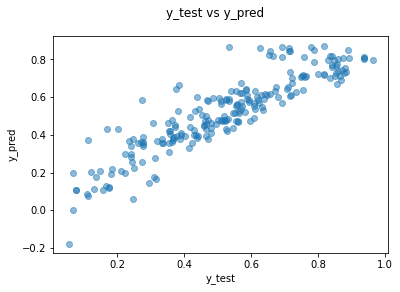

In [464]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

### Equation of the Best fit line is: 

cnt = 0.260908 + (0.231712 * yr) + (0.424181 * temp) - (0.147194 * windspeed) - (0.125117 * Spring) + (0.049700 * Winter) + (0.062063 * Mar) + (0.071857 * Sep) - (0.313553 * Light_rainsnow) - (0.071187 * Misty)

### R-Squared Value Calculation for bike_test dataframe

In [465]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8076

### Adjusted R-Squared Value Calculation for bike_test dataframe

In [466]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7994

In [469]:
""" %%html
<style>
table {float:left}
</style> """

### Model Train & Test R-Squared  Statsitics Comparison

| Measurement	           | Train Dataset | Test Dataset |
| :- |-------------: | :-:
| R-Squared Value	       |     82.2%	   |    80.76%    |
| Adjusted R-Squared Value |     81.9%	   |    79.94%    |

- It seems to be really a good model that can generalize various datasets.

### Final Model Summary

**As per the final model, the top 3 predictor variables that influences bike booking are**:

- **Temperature (Temp)**: A coefficient value of ‘0.424181’ indicated that a temperature has significant impact on bike rentals.

- **Light Rain & Snow (weathersit =3)**: A coefficient value of ‘-0.313553’ indicated that the light snow and rain deters people from renting out bikes.

- **Year (yr)**: A coefficient value of ‘0.231712’ indicated that year wise, the rental numbers are increasing.

It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.
As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.